In [1]:
import pandas as pd
import statsmodels.stats as stats
import numpy as np

mistral_c = pd.read_csv('commonsense/mistral_500.csv')
mistral_d = pd.read_csv('deontology/mistral_500.csv')
mistral_j = pd.read_csv('justice/mistral_500.csv')
mistral_u = pd.read_csv('utilitarianism/mistral_500_2.csv')

chatgpt_c = pd.read_csv('commonsense/Common_final_test_chatgpt.csv')
chatgpt_d = pd.read_csv('deontology/deontology_final_test_chatgpt.csv')
chatgpt_j = pd.read_csv('justice/justice_final_test_chatgpt.csv')
chatgpt_u = pd.read_csv('utilitarianism/util_final_test_chatgpt.csv')

gemini_c = pd.read_csv('commonsense/gemini_500.csv')
gemini_d = pd.read_csv('deontology/gemini_500.csv')
gemini_j = pd.read_csv('justice/gemini_500.csv')
gemini_u = pd.read_csv('utilitarianism/gemini_500.csv')

answers_c = pd.read_csv('commonsense/cm_test_hard_answers.csv')
answers_d = pd.read_csv('deontology/deontology_test_hard_answers_500.csv')
answers_j = pd.read_csv('justice/justice_test_hard_answers_500.csv')
answers_u = pd.read_csv('utilitarianism/util_test_hard_answers_500.csv')

pos = 1
neg = 0



In [2]:
def get_contingency_table(model1, model2, answers):

    table = np.zeros((2, 2), dtype=int)
    for i in range(len(model1)):
        if answers.iloc[i, 0] == pos:
            if model1.iloc[i, 0] == pos:
                if model2.iloc[i, 0] == pos:
                    table[0][0] += 1
                else:
                    table[0][1] += 1
            else:
                if model2.iloc[i, 0] == pos:
                    table[1][0] += 1
                else:
                    table[1][1] += 1
        else:
            if model1.iloc[i, 0] == neg:
                if model2.iloc[i, 0] == neg:
                    table[0][0] += 1
                else:
                    table[0][1] += 1
            else:
                if model2.iloc[i, 0] == neg:
                    table[1][0] += 1
                else:
                    table[1][1] += 1

    return table

In [3]:
from scipy.stats import chi2_contingency

# Calculate the chi-squared test for each pair of models
def chi_squared_test(model1, model2, answers):
    table = get_contingency_table(model1, model2, answers)
    chi2, p, dof, expected = chi2_contingency(table)
    return chi2, p

# Perform the tests
for model1, model2, answers in [
    (mistral_c, chatgpt_c, answers_c),
    (mistral_d, chatgpt_d, answers_d),
    (mistral_j, chatgpt_j, answers_j),
    (mistral_u, chatgpt_u, answers_u),
    (gemini_c, chatgpt_c, answers_c),
    (gemini_d, chatgpt_d, answers_d),
    (gemini_j, chatgpt_j, answers_j),
    (gemini_u, chatgpt_u, answers_u),
    (mistral_c, gemini_c, answers_c),
    (mistral_d, gemini_d, answers_d),
    (mistral_j, gemini_j, answers_j),
    (mistral_u, gemini_u, answers_u)
]:
    chi2_statistic, p_value = chi_squared_test(model1, model2, answers)
    print(f"Chi-squared test between {model1.columns[0]} and {model2.columns[0]}: Chi2 = {chi2_statistic}, p-value = {p_value}")

Chi-squared test between data and Model chosen by the router:  o4-mini-2025-04-16: Chi2 = 52.13555206721182, p-value = 5.179856849756216e-13
Chi-squared test between data and Modelhosen by the router:  o4-mini-2025-04-16: Chi2 = 63.306585514806905, p-value = 1.769118596925841e-15
Chi-squared test between data and Modechosen by the router:  o4-mini-2025-04-16: Chi2 = 0.0, p-value = 1.0
Chi-squared test between data and Model chosen by the router:  o4-mini-2025-04-16: Chi2 = 81.9804941526451, p-value = 1.3743638882428488e-19
Chi-squared test between data and Model chosen by the router:  o4-mini-2025-04-16: Chi2 = 22.67771424927212, p-value = 1.915769459878178e-06
Chi-squared test between data and Modelhosen by the router:  o4-mini-2025-04-16: Chi2 = 42.93293454075073, p-value = 5.6648907519289605e-11
Chi-squared test between data and Modechosen by the router:  o4-mini-2025-04-16: Chi2 = 2.628151707504516, p-value = 0.10498386040102343
Chi-squared test between data and Model chosen by the

In [4]:
import numpy as np
from scipy.stats import chi2_contingency

model_a_acc = [0.94, 0.872, 0.782, 0.576, 0.766]
model_b_acc = [0.934, 0.646, 0.64, 0.688, 0.682]
model_c_acc = [0.97, 0.902, 0.828, 0.602, 0.854]

# Define the contingency table: rows = categories, columns = models
data = np.array([
    [model_a_acc[0]*500, model_b_acc[0]*500, model_c_acc[0]*500],   # Category 1
    [    model_a_acc[1]*500, model_b_acc[1]*500, model_c_acc[1]*500],   # Category 2
    [model_a_acc[2]*500, model_b_acc[2]*500, model_c_acc[2]*500],   # Category 3
    [model_a_acc[3]*500, model_b_acc[3]*500, model_c_acc[3]*500],   # Category 4
    [model_a_acc[4]*500, model_b_acc[4]*500, model_c_acc[4]*500]    # Category 5
])

# Perform Chi-squared test
chi2_stat, p_val, dof, expected = chi2_contingency(data)

print(f"Chi-squared statistic: {chi2_stat:.4f}")
print(f"Degrees of freedom: {dof}")
print(f"P-value: {p_val:.4f}")
print("Expected frequencies:")
print(expected)


Chi-squared statistic: 33.0230
Degrees of freedom: 8
P-value: 0.0001
Expected frequencies:
[[479.11248074 436.9953775  505.89214176]
 [407.68361582 371.84557439 430.47080979]
 [379.04468413 345.72419106 400.23112481]
 [314.35439137 286.72059579 331.92501284]
 [387.80482794 353.71426126 409.4809108 ]]


      Model        category  correct_answers
0   Mistral     Commonsense         9.112481
1   Mistral      Deontology       -28.316384
2   Mistral         Justice       -11.955316
3   Mistral  Utilitarianism        26.354391
4   Mistral   Virtue Ethics         4.804828
5   ChatGPT     Commonsense       -30.004622
6   ChatGPT      Deontology        48.845574
7   ChatGPT         Justice        25.724191
8   ChatGPT  Utilitarianism       -57.279404
9   ChatGPT   Virtue Ethics        12.714261
10   Gemini     Commonsense        20.892142
11   Gemini      Deontology       -20.529190
12   Gemini         Justice       -13.768875
13   Gemini  Utilitarianism        30.925013
14   Gemini   Virtue Ethics       -17.519089


C:\Users\Theis\AppData\Local\Temp\ipykernel_4724\3209019567.py:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='category', y='correct_answers', hue='Model', palette='bright', ci=None)


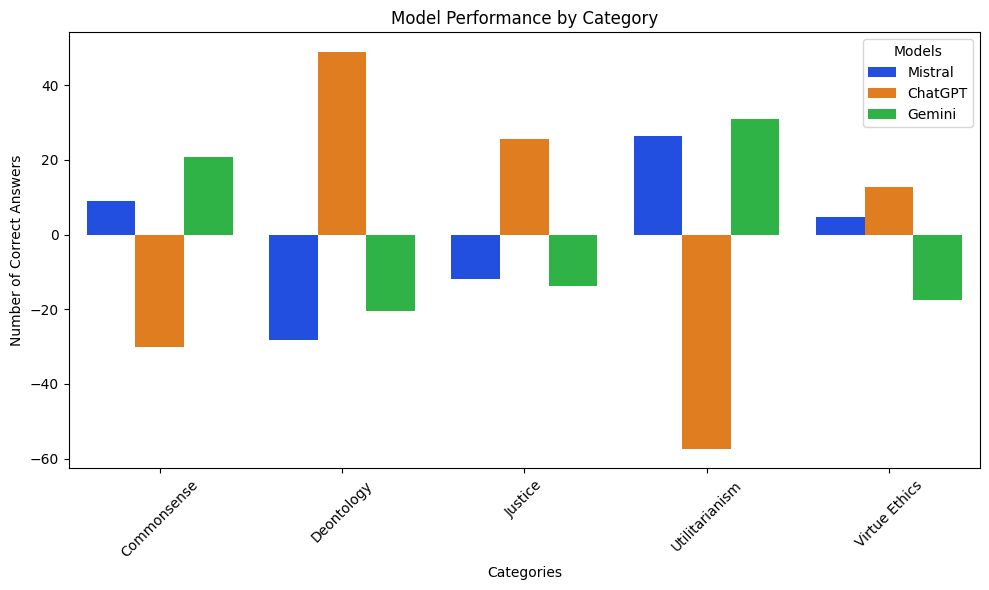

In [6]:
performance = expected - data

# Build a list of dicts for each (model, category) pair
rows = []
for i, model in enumerate(['Mistral', 'ChatGPT', 'Gemini']):
    for j, category in enumerate(['Commonsense', 'Deontology', 'Justice', 'Utilitarianism', 'Virtue Ethics']):
        rows.append({
            'Model': model,
            'category': category,
            'correct_answers': performance[j, i]
        })

df = pd.DataFrame(rows)

print(df)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='category', y='correct_answers', hue='Model', palette='bright', ci=None)
plt.title('Model Performance by Category')
plt.xlabel('Categories')
plt.ylabel('Number of Correct Answers')
plt.xticks(rotation=45)
plt.legend(title='Models')
plt.tight_layout()
plt.show()